In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from scipy import stats, integrate
from sklearn.kernel_approximation import Nystroem
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, CondensedNearestNeighbour
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, CondensedNearestNeighbour
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression, f_classif
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import VarianceThreshold, SelectPercentile
#from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

target = train_data.y
train_data = train_data.drop("y", axis = 1)

train_data.head()

id  age          job  marital            education  default housing loan  \
0   0   36  blue-collar  married             basic.9y  unknown      no   no   
1   1   34   technician  married  professional.course       no     yes   no   
2   2   28      student   single    university.degree  unknown     yes   no   
3   3   36   technician   single          high.school       no     yes   no   
4   4   53  blue-collar  married              unknown  unknown     yes   no   

     contact  month  day_of_week  campaign  pdays  previous     poutcome  \
0  telephone      5            2         1    999         0  nonexistent   
1   cellular      7            4         3    999         0  nonexistent   
2   cellular      5            4         2    999         0  nonexistent   
3   cellular      5            4         1    999         1      failure   
4   cellular      7            5         2    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0           1.1          93.994          -36.4      4.856       5191.0  
1           1.4          93.918          -42.7      4.968       5228.1  
2          -1.8          92.893          -46.2      1.327       5099.1  
3          -1.8          92.893          -46.2      1.327       5099.1  
4           1.4          93.918          -42.7      4.962       5228.1

In [3]:
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'month', 'day_of_week']
continuous_vars = ['age', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']

In [4]:
continuous_vars
output_df = pd.DataFrame(test_data["id"])

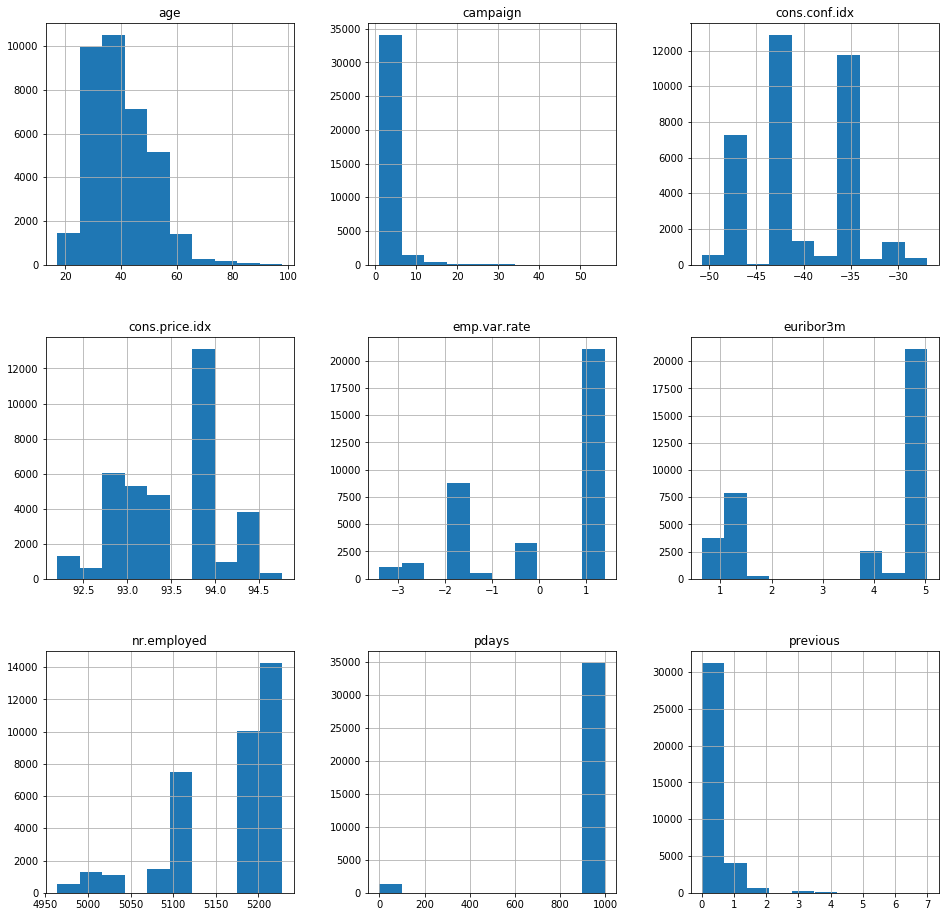

In [5]:
histo = train_data.hist(column=continuous_vars, figsize = (16,16))

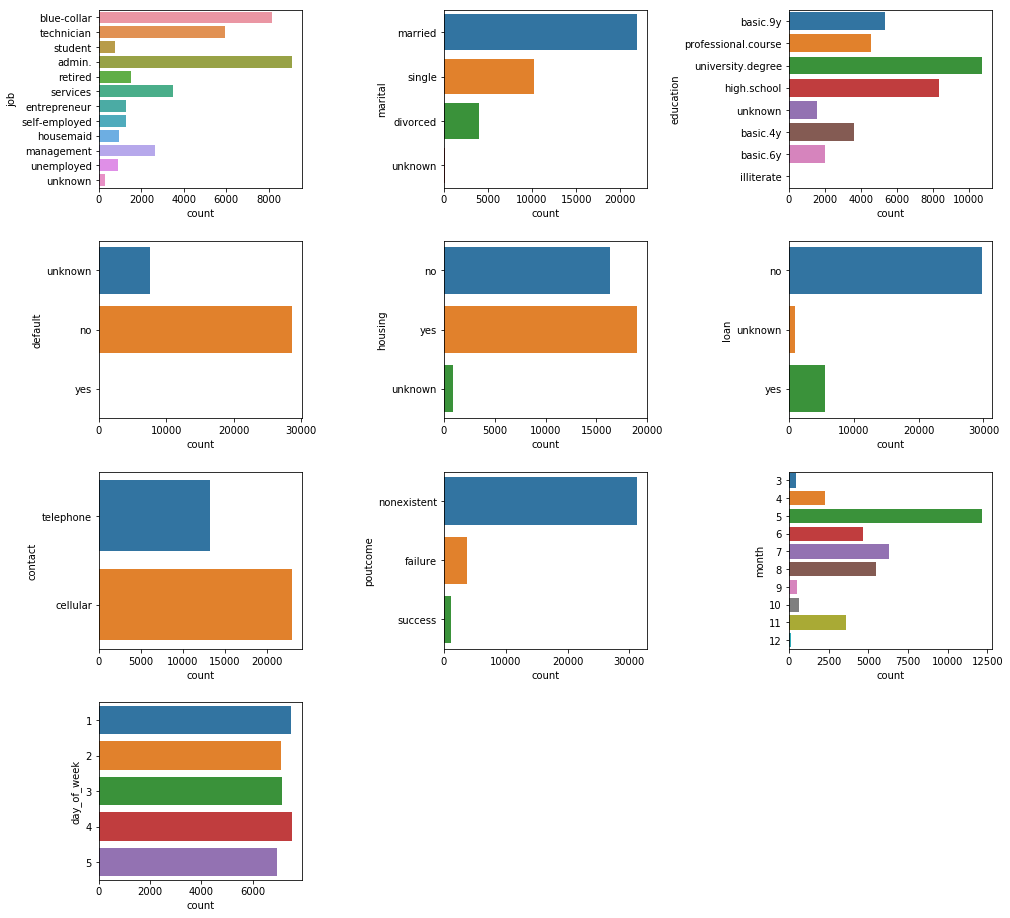

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=train_data, ax=ax)

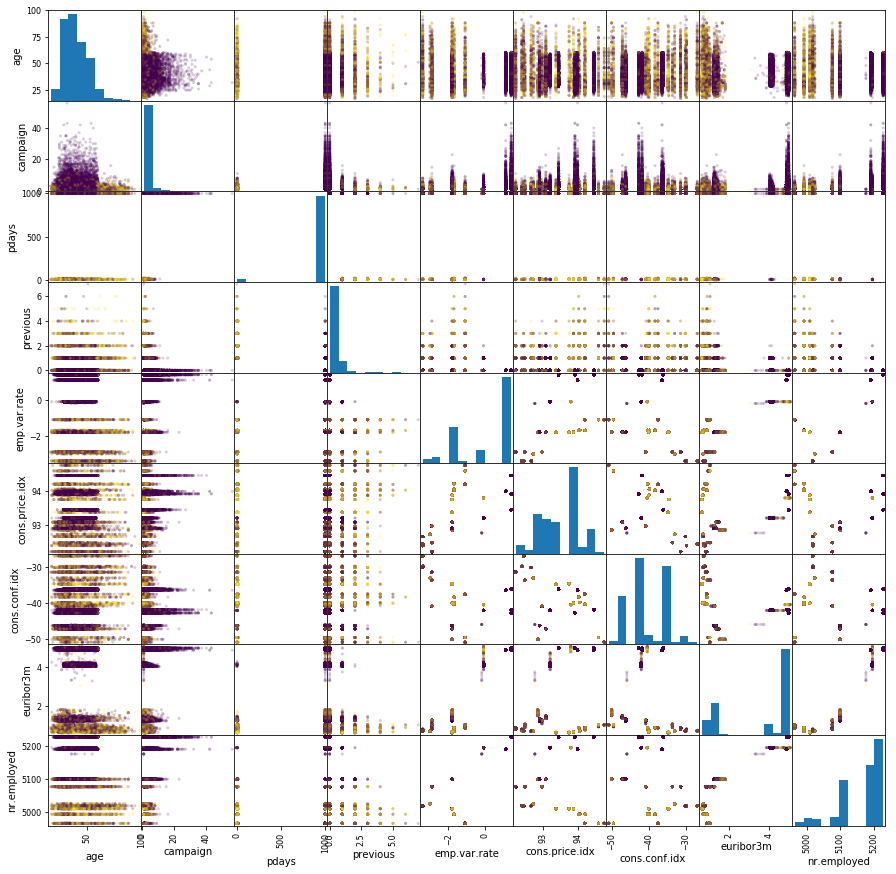

In [7]:
pd.plotting.scatter_matrix(train_data[continuous_vars], c=target, alpha=.2, figsize=(15, 15), cmap="viridis");

In [8]:
train_data_dummies = pd.get_dummies(train_data, columns = categorical_vars, drop_first = True)
train_data_dummies.drop("id", axis=1, inplace=True)
test_data_dummies = pd.get_dummies(test_data, columns = categorical_vars, drop_first = True)

In [9]:
test_data_dummies.head()

id  age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   0   35         2    999         0           1.4          94.465   
1   1   27         1    999         0          -1.8          92.893   
2   2   28         2    999         0           1.1          93.994   
3   3   47         1    999         0          -1.8          92.893   
4   4   53         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed      ...        month_7  month_8  \
0          -41.8      4.961       5228.1      ...              0        0   
1          -46.2      1.266       5099.1      ...              0        0   
2          -36.4      4.858       5191.0      ...              0        0   
3          -46.2      1.244       5099.1      ...              0        0   
4          -36.4      4.859       5191.0      ...              0        0   

   month_9  month_10  month_11  month_12  day_of_week_2  day_of_week_3  \
0        0         0         0         0              1              0   
1        0         0         0         0              0              0   
2        0         0         0         0              0              1   
3        0         0         0         0              0              0   
4        0         0         0         0              0              0   

   day_of_week_4  day_of_week_5  
0              0              0  
1              1              0  
2              0              0  
3              0              0  
4              0              1  

[5 rows x 52 columns]

In [10]:
test_data.head()
    
test_ids = pd.DataFrame(test_data["id"])
test_data_dummies.drop("id", axis=1, inplace=True)


test_data_dummies['default_yes'] = 0
test_data_dummies = test_data_dummies[train_data_dummies.columns]
test_data_dummies.head()

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   35         2    999         0           1.4          94.465   
1   27         1    999         0          -1.8          92.893   
2   28         2    999         0           1.1          93.994   
3   47         1    999         0          -1.8          92.893   
4   53         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar      ...        \
0          -41.8      4.961       5228.1                0      ...         
1          -46.2      1.266       5099.1                0      ...         
2          -36.4      4.858       5191.0                1      ...         
3          -46.2      1.244       5099.1                0      ...         
4          -36.4      4.859       5191.0                0      ...         

   month_7  month_8  month_9  month_10  month_11  month_12  day_of_week_2  \
0        0        0        0         0         0         0              1   
1        0        0        0         0         0         0              0   
2        0        0        0         0         0         0              0   
3        0        0        0         0         0         0              0   
4        0        0        0         0         0         0              0   

   day_of_week_3  day_of_week_4  day_of_week_5  
0              0              0              0  
1              0              1              0  
2              1              0              0  
3              0              0              0  
4              0              0              1  

[5 rows x 52 columns]

In [11]:
def create_submission_output(output_df, pipe):
    output = pd.concat([output_df, pd.DataFrame(pipe.predict_proba(test_data_dummies)[:, 1])], axis=1)
    output.rename(columns = {0:"y"}, inplace=True)
    output['y'] = output['y'].apply(lambda x: int(round(x,0)))
    output['y'].astype(int)
    pd.to_numeric(output['y'], downcast='integer')
    output.set_index("id").to_csv("output.csv")
    return output.head()

In [12]:
categorical_dummies = pd.get_dummies(train_data[categorical_vars], drop_first = True).columns

In [13]:
categorical_dummies

Index(['month', 'day_of_week', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [14]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_union

select_categorical = FunctionTransformer(lambda X: X[categorical_dummies],validate = False)
select_continuous = FunctionTransformer(lambda X: X[continuous_vars],validate = False)

In [15]:
fu = make_union(select_categorical, make_pipeline(select_continuous, StandardScaler()))
pipe = make_pipeline(fu, LogisticRegressionCV())

print(np.mean(cross_val_score(pipe, train_data_dummies, target, cv=5, scoring="roc_auc")))

KeyError: "Index(['month', 'day_of_week'], dtype='object') not in index"

In [ ]:
pipe.fit(train_data_dummies, target)

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegressionCV())
print(np.mean(cross_val_score(pipe, train_data_dummies, target, cv=5, scoring="roc_auc")))



In [ ]:
pipe.fit(train_data_dummies, target)

In [ ]:
plt.figure(figsize=(5, 15))
coef = pd.Series(pipe.named_steps['logisticregressioncv'].coef_.ravel(), index=train_data_dummies.columns)

coef.sort_values().plot(kind="barh")

In [ ]:


approx = Nystroem(gamma=1./train_data_dummies.shape[1], n_components=300)

pipe = make_pipeline(StandardScaler(), approx, LogisticRegressionCV())

print(np.mean(cross_val_score(pipe, train_data_dummies, target, cv=5, scoring="roc_auc")))

In [ ]:
pipe.fit(train_data_dummies, target)

In [ ]:
pipe = make_pipeline(StandardScaler(), SelectPercentile(score_func=f_classif, percentile=50), 
                     PolynomialFeatures(interaction_only=True), 
                     VarianceThreshold(),
                     LogisticRegressionCV())
print(np.mean(cross_val_score(pipe, train_data_dummies, target, cv=5, scoring="roc_auc")))

In [ ]:
pipe.fit(train_data_dummies, target)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])

In [ ]:
select_lassocv = SelectFromModel(LassoCV(), threshold="median")
pipe_lassocv = make_pipeline(StandardScaler(), select_lassocv, LogisticRegressionCV())
print(np.mean(cross_val_score(pipe_lassocv, train_data_dummies, target, cv=10, scoring="roc_auc")))


In [ ]:
pipe_lassocv.fit(train_data_dummies, target)

In [ ]:


pipe = make_pipeline(SelectPercentile(score_func=f_classif, percentile=50), 
                     PolynomialFeatures(interaction_only=True), 
                     VarianceThreshold(),
                     LogisticRegressionCV())
param_grid = {'selectpercentile__percentile': [50], 
              'polynomialfeatures__degree': [2]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="roc_auc")

In [ ]:


grid.fit(train_data_dummies, target)



In [ ]:
grid.best_score_


In [ ]:
grid.best_params

In [18]:
#### MLP

mlp_pipe =  make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes = 5))
param_grid = {'mlpclassifier__hidden_layer_sizes': [5, 10, 50, 100, 200]}
param_grid = {} # to optimize code running on travis, the best value is selected by doing the runs
grid = GridSearchCV(mlp_pipe, param_grid, cv=5, scoring="roc_auc")

In [19]:


grid.fit(train_data_dummies, target)



GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
      ...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [20]:
grid.best_score_

0.7899623452736161

In [21]:
grid.best_params_

{}

In [ ]:
create_submission_output(output_df, grid)

In [25]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

scaled_svc = make_pipeline(StandardScaler(), LinearSVC())
clf = CalibratedClassifierCV(scaled_svc) 

print(np.mean(cross_val_score(clf, train_data_dummies, target, cv=5, scoring="roc_auc")))



0.7857356645158564


In [43]:
clf.fit(train_data_dummies, target)

CalibratedClassifierCV(base_estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearsvc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
            cv=3, method='sigmoid')

In [42]:
create_submission_output(output_df, clf)

id  y
0   0  0
1   1  0
2   2  0
3   3  0
4   4  0

In [45]:

rf = RandomForestClassifier(warm_start=True, n_estimators=80,
                            max_depth=9,
                            max_features = 16, 
                            criterion = 'entropy')
params = {}
pipe = make_pipeline(rf)
grid = GridSearchCV(pipe, param_grid = params, scoring='roc_auc', n_jobs=-1,iid=False, cv=5)
grid.fit(train_data_dummies, target)
print(grid.best_score_)



0.8067758453760865


In [46]:
create_submission_output(output_df, grid)

id  y
0   0  0
1   1  0
2   2  0
3   3  0
4   4  0

In [47]:
param_test = {}
pipe = make_pipeline(GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=80, 
                                                 random_state=10, min_samples_split = 1000))
grid = GridSearchCV(pipe, param_grid = param_test, scoring='roc_auc', n_jobs=-1, iid=True, cv=5)
grid.fit(train_data_dummies, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              m...        presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [48]:
print(grid.best_score_)

0.7990304263218687


In [20]:


clf1 = make_pipeline(StandardScaler(),LogisticRegressionCV(random_state=10))
clf2 = RandomForestClassifier(warm_start=True,n_estimators=80,max_depth=9,max_features = 16, criterion = 'entropy', random_state=10)
clf3 = GradientBoostingClassifier(learning_rate=0.1,max_depth=5, n_estimators=200, random_state=10,min_samples_split = 1000)

voting = VotingClassifier([('logreg', clf1),('RandomForest', clf2),('GradientBoost',clf3)], voting='soft')
                     
print(np.mean(cross_val_score(voting, train_data_dummies, target,scoring = 'roc_auc', cv=5)))

0.8034154860147641


In [21]:
voting.fit(train_data_dummies,target)
create_submission_output(output_df, voting)

id  y
0   0  0
1   1  0
2   2  0
3   3  0
4   4  0

In [56]:
from sklearn.preprocessing import FunctionTransformer

reshaper = FunctionTransformer(lambda X_: np.rollaxis(X_, 1).reshape(-1, 6)[:, 1::2], validate=False)
stacking = make_pipeline(voting, reshaper,
                         LogisticRegressionCV())
print(np.mean(cross_val_score(stacking,train_data_dummies, target, scoring = 'roc_auc',cv=5)))



/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/voting_classifier.py:290: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set flatten_transform=False.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/voting_classifier.py:290: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set flatten_transform=False.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/voting_classifier.py:290: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set flatten_transform=False.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/voting_classifier.py:290: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set

0.7881605076692295


/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/voting_classifier.py:290: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set flatten_transform=False.
  DeprecationWarning)


In [57]:
stacking.fit(train_data_dummies, target)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/voting_classifier.py:290: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set flatten_transform=False.
  DeprecationWarning)


Pipeline(memory=None,
     steps=[('votingclassifier', VotingClassifier(estimators=[('logreg', Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregressioncv', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=Tr...2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [18]:
clf1 = make_pipeline(StandardScaler(),LogisticRegressionCV(random_state=10))
clf2 = make_pipeline(StandardScaler(), RandomForestClassifier(warm_start=True,n_estimators=80, max_depth=9, max_features = 16, criterion = 'entropy', random_state=10))
clf3 = make_pipeline(StandardScaler(), GradientBoostingClassifier(learning_rate=0.1,max_depth=5, n_estimators=80, random_state=10, min_samples_split = 1000))

voting = VotingClassifier([('logreg', clf1), ('RandomForest', clf2), ('GradientBoost',clf3)],weights = [2, 5, 3], voting='soft')
                     
output = np.mean(cross_val_score(voting, train_data_dummies, target, scoring = 'roc_auc', cv=5))
print(output)



0.8042979549895722


In [19]:


voting.fit(train_data_dummies,target)
create_submission_output(output_df, voting)


id  y
0   0  0
1   1  0
2   2  0
3   3  0
4   4  0

In [67]:
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), LogisticRegressionCV())
scores = cross_val_score(undersample_pipe, train_data_dummies, target, cv=10, scoring='roc_auc')
print(np.mean(scores))

0.787502065202922


In [68]:
undersample_pipe_rf = make_imb_pipeline(RandomUnderSampler(), 
                                        RandomForestClassifier(warm_start=True,
                                                               n_estimators=80,
                                                               max_depth=9,
                                                               max_features = 16, 
                                                               criterion = 'entropy'))
scores = cross_val_score(undersample_pipe_rf, train_data_dummies, target, cv=10, scoring='roc_auc')
print(np.mean(scores))

0.8023002106868902


In [70]:
oversample_pipe_rf = make_imb_pipeline(RandomOverSampler(), RandomForestClassifier(warm_start=True,
                                                                                   n_estimators=80,
                                                                                   max_depth=9,
                                                                                   max_features = 16, 
                                                                                   criterion = 'entropy'))
scores = cross_val_score(oversample_pipe_rf, train_data_dummies, target, cv=10, scoring='roc_auc')
print(np.mean(scores))

0.8051933621938467


In [71]:
scores = cross_val_score(LogisticRegression(class_weight='balanced'),
                         train_data_dummies, target, cv=10, scoring='roc_auc')
print(scores.mean())

0.7904406589808886


In [72]:


from sklearn.ensemble import RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(n_estimators=80,
                                                max_depth=9,
                                                max_features = 16, 
                                                criterion = 'entropy',
                                                class_weight='balanced'),
                         train_data_dummies, target, cv=10, scoring='roc_auc')
print(np.mean(scores))



0.8067533652293314


In [15]:
rf = RandomForestClassifier(warm_start=True)
params = {'randomforestclassifier__n_estimators' : range(80,100,2), 
          'randomforestclassifier__max_depth' : range(3,15,2)}
pipe = make_pipeline(rf)
grid = GridSearchCV(pipe, param_grid = params, scoring='roc_auc', n_jobs=-1,iid=False, cv=5)
grid.fit(train_data_dummies, target)
print(grid.best_score_)



0.8117534347591292


In [16]:
print(grid.best_params_)


{'randomforestclassifier__n_estimators': 96, 'randomforestclassifier__max_depth': 13}


In [17]:


rf = RandomForestClassifier(warm_start=True, n_estimators=96, max_depth=13)
params = {'randomforestclassifier__max_features' : range(7, 53, 9),
          'randomforestclassifier__criterion' : ['gini', 'entropy']}
pipe = make_pipeline(rf)
grid = GridSearchCV(pipe,param_grid = params, scoring='roc_auc', n_jobs=-1, iid=False, cv=5)
grid.fit(train_data_dummies, target)
print(grid.best_score_)



0.8138568733234551


In [18]:
print(grid.best_params_)


{'randomforestclassifier__max_features': 16, 'randomforestclassifier__criterion': 'gini'}


In [19]:


rf = RandomForestClassifier(warm_start=True, n_estimators=96,
                            max_depth=13,
                            max_features = 16, 
                            criterion = 'gini')
params = {}
pipe = make_pipeline(rf)
grid = GridSearchCV(pipe, param_grid = params, scoring='roc_auc', n_jobs=-1,iid=False, cv=5)
grid.fit(train_data_dummies, target)
print(grid.best_score_)



0.8138583053656084


In [20]:
create_submission_output(output_df, grid)

id  y
0   0  0
1   1  0
2   2  0
3   3  0
4   4  0